In [1]:
import pandas as pd

# Load the provided dataset
file_path = 'Job_trends.xlsx'
job_trends_data = pd.read_excel(file_path)

# Display the first few rows and the structure of the dataset
job_trends_data.head(), job_trends_data.info()


C:\Users\sajal\AppData\Local\Temp\ipykernel_1440\403942210.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Job Title         364 non-null    object        
 1   Job Description   364 non-null    object        
 2   Required Skills   364 non-null    object        
 3   Salary Range      364 non-null    object        
 4   Location          364 non-null    object        
 5   Company           364 non-null    object        
 6   Experience Level  364 non-null    object        
 7   Industry          364 non-null    object        
 8   Job Type          364 non-null    object        
 9   Date Posted       364 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(9)
memory usage: 28.6+ KB


(               Job Title    Job Description Required Skills  \
 0      Software Engineer   Develop software    Java, Python   
 1           Data Analyst       Analyze data      SQL, Excel   
 2       Network Engineer  Maintain networks      Cisco, WAN   
 3        Cloud Architect       Design cloud      AWS, Azure   
 4  Cybersecurity Analyst       Protect data   Cybersecurity   
 
         Salary Range    Location            Company Experience Level  \
 0  £40,000 - £60,000      London           ABC Tech      Entry-Level   
 1  £35,000 - £50,000  Manchester      XYZ Analytics           Junior   
 2  £45,000 - £70,000  Birmingham  Network Solutions        Mid-Level   
 3  £60,000 - £90,000   Edinburgh   Cloud Innovators           Senior   
 4  £50,000 - £80,000     Glasgow        SecureGuard        Mid-Level   
 
           Industry   Job Type Date Posted  
 0       Technology  Full-Time  2023-01-05  
 1        Analytics  Full-Time  2023-02-10  
 2       Networking  Full-Time  2023-03

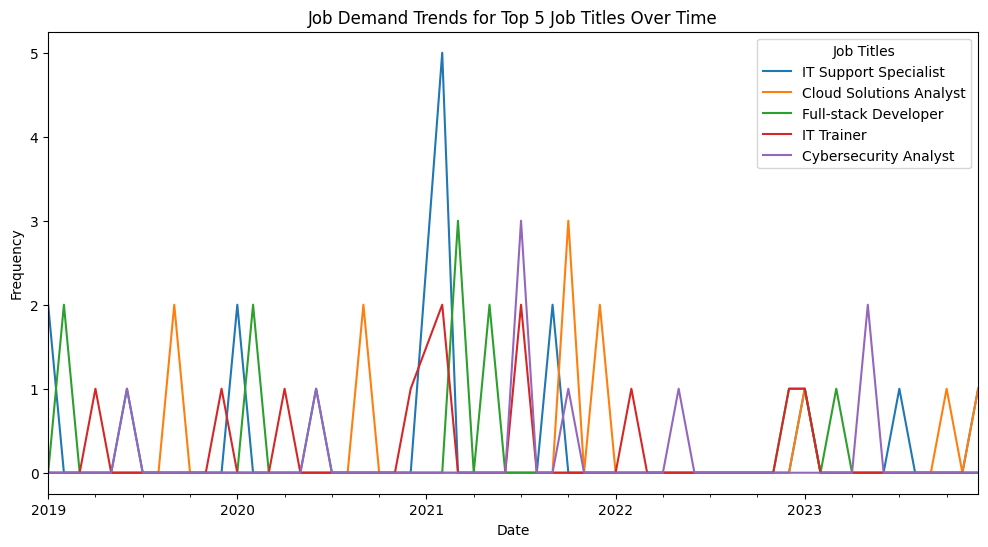

C:\Users\sajal\AppData\Local\Temp\ipykernel_1440\2525415537.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette="viridis")


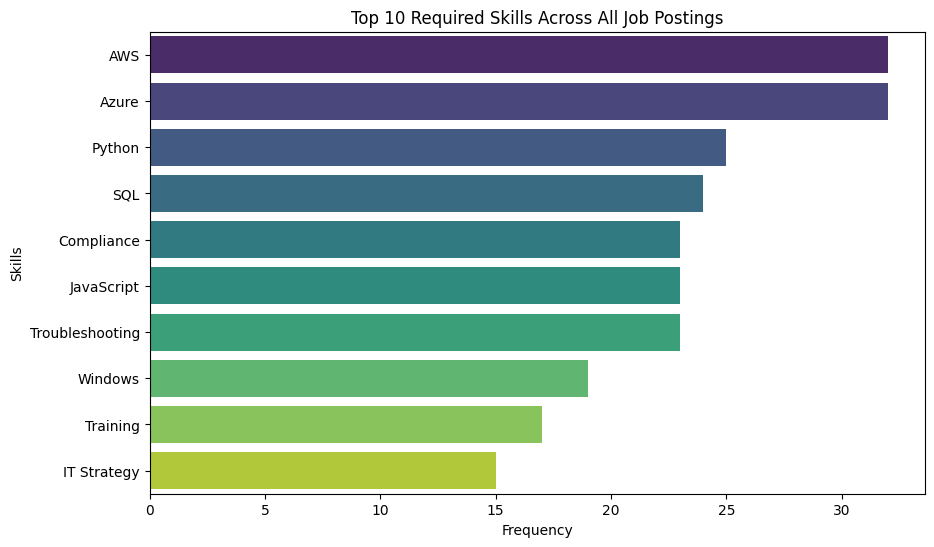

C:\Users\sajal\AppData\Local\Temp\ipykernel_1440\2525415537.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_demand.values, y=location_demand.index, palette="magma")


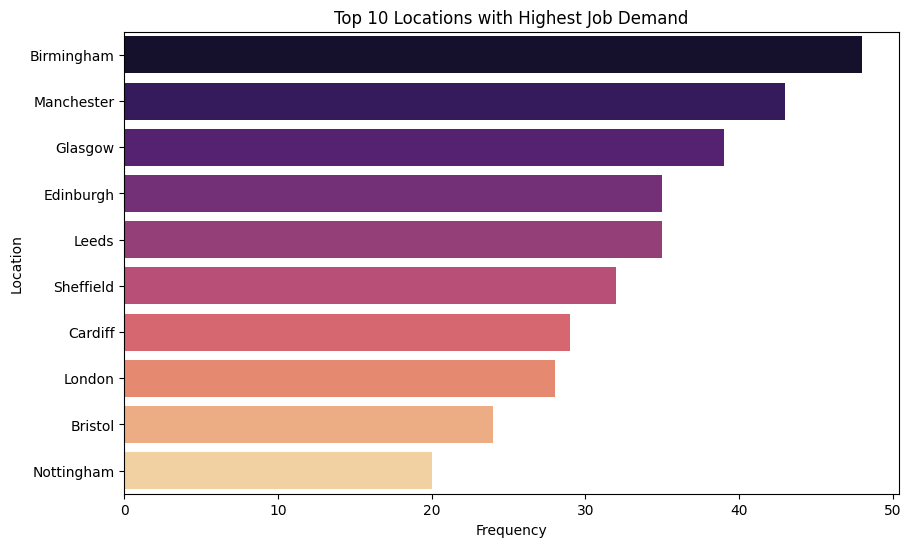

C:\Users\sajal\AppData\Local\Temp\ipykernel_1440\2525415537.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=experience_avg_salary.values, y=experience_avg_salary.index, palette="cool")


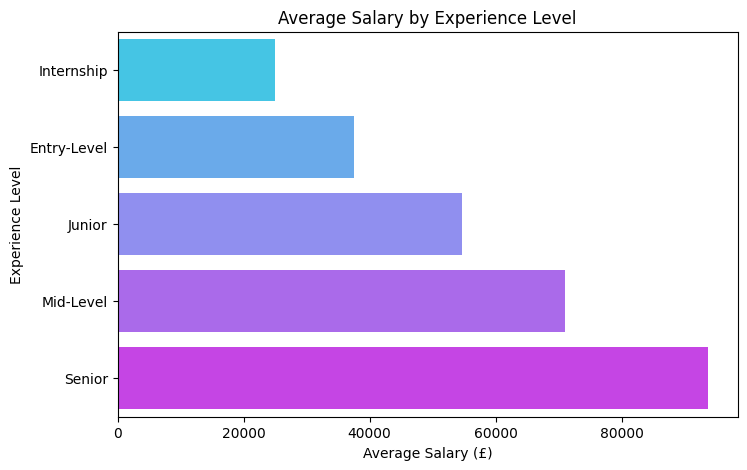

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the date column to a datetime format for time series analysis
job_trends_data['Date Posted'] = pd.to_datetime(job_trends_data['Date Posted'])

# 1. Job Demand Trends: Analyze the frequency of each job title over time
job_trends_data['Year_Month'] = job_trends_data['Date Posted'].dt.to_period('M')
job_demand_trends = job_trends_data.groupby(['Year_Month', 'Job Title']).size().unstack(fill_value=0)

# Plot the job demand trend for top 5 most common job titles
top_jobs = job_demand_trends.sum().nlargest(5).index
job_demand_trends[top_jobs].plot(figsize=(12, 6))
plt.title("Job Demand Trends for Top 5 Job Titles Over Time")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.legend(title="Job Titles")
plt.show()

# 2. Skill Trends: Analyze the most required skills across jobs
# Split skills into individual rows
skills_data = job_trends_data['Required Skills'].str.get_dummies(sep=', ')
top_skills = skills_data.sum().nlargest(10)

# Plot top 10 most common skills
plt.figure(figsize=(10, 6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette="viridis")
plt.title("Top 10 Required Skills Across All Job Postings")
plt.xlabel("Frequency")
plt.ylabel("Skills")
plt.show()

# 3. Location-Based Demand: Analyze job demand based on location
location_demand = job_trends_data['Location'].value_counts().nlargest(10)

# Plot top 10 locations with the highest job demand
plt.figure(figsize=(10, 6))
sns.barplot(x=location_demand.values, y=location_demand.index, palette="magma")
plt.title("Top 10 Locations with Highest Job Demand")
plt.xlabel("Frequency")
plt.ylabel("Location")
plt.show()

# 4. Experience Level and Salary Range Analysis: Experience Level vs Salary Range
experience_salary = job_trends_data[['Experience Level', 'Salary Range']].copy()

# Extract average salary (using midpoint for simplicity)
def parse_salary(salary_range):
    try:
        lower, upper = salary_range.replace('£', '').split(' - ')
        return (int(lower.replace(',', '')) + int(upper.replace(',', ''))) / 2
    except:
        return None

experience_salary['Average Salary'] = experience_salary['Salary Range'].apply(parse_salary)

# Plot average salary by experience level
experience_avg_salary = experience_salary.groupby('Experience Level')['Average Salary'].mean().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=experience_avg_salary.values, y=experience_avg_salary.index, palette="cool")
plt.title("Average Salary by Experience Level")
plt.xlabel("Average Salary (£)")
plt.ylabel("Experience Level")
plt.show()


In [5]:
def calculate_financial_equation(num_customers, subscription_fee, ad_revenue, total_cost):
    """
    Calculate the financial outcome for an AI-based job prediction platform.

    Parameters:
    - num_customers (int): Number of customers subscribed to the platform.
    - subscription_fee (float): Subscription fee per customer (e.g., monthly).
    - ad_revenue (float): Monthly advertisement revenue.
    - total_cost (float): Total monthly operational costs (e.g., server, marketing).

    Returns:
    - float: The calculated financial outcome (profit or loss).
    """
    # Calculate total revenue from customers and ads
    customer_revenue = num_customers * subscription_fee
    total_revenue = customer_revenue + ad_revenue
    
    # Calculate the financial outcome (profit/loss)
    financial_outcome = total_revenue - total_cost
    
    # Print details of the financial breakdown
    print("=== Financial Calculation Breakdown ===")
    print(f"Number of Customers: {num_customers}")
    print(f"Subscription Fee per Customer: {subscription_fee}")
    print(f"Customer Revenue: {customer_revenue}")
    print(f"Ad Revenue: {ad_revenue}")
    print(f"Total Revenue (Customer + Ad): {total_revenue}")
    print(f"Total Monthly Costs: {total_cost}")
    print(f"Financial Outcome (Profit/Loss): {financial_outcome}")
    
    return financial_outcome

# Example usage of the function with hypothetical values
num_customers = 1000          # Number of customers using the platform
subscription_fee = 50         # Subscription fee per customer in currency units
ad_revenue = 10000            # Monthly ad revenue in currency units
total_cost = 30000            # Total monthly costs in currency units

# Calculate the financial result
financial_result = calculate_financial_equation(num_customers, subscription_fee, ad_revenue, total_cost)

# Print the final financial outcome
print("\n=== Final Financial Result ===")
print(f"Net Financial Outcome: {financial_result}")


=== Financial Calculation Breakdown ===
Number of Customers: 1000
Subscription Fee per Customer: 50
Customer Revenue: 50000
Ad Revenue: 10000
Total Revenue (Customer + Ad): 60000
Total Monthly Costs: 30000
Financial Outcome (Profit/Loss): 30000

=== Final Financial Result ===
Net Financial Outcome: 30000
